# TALLER Clase 21- Normalidad y autocorrelación de los errores

Alejandro Mantilla Redondo - 201711304

Ximena Palacio Argüello - 201730995

En el archivo `gasto.txt` se encuentra información sobre el gasto de un hogar determinado en términos del ingreso mensual durante 20 meses.

In [6]:
data <- read.table("Archivos/gasto.txt", head = TRUE)
head(data)

,ingreso,gasto
,<dbl>,<dbl>
1,214.6,159.3
2,217.7,161.2
3,219.6,162.8
4,227.2,164.6
5,230.9,165.9
6,233.3,167.9


Declaramos un modelo de regresión lineal simple.

In [11]:
modelo <- lm(gasto ~ ingreso, data = data)
summary(modelo)


Call:
lm(formula = gasto ~ ingreso, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1684 -1.0469 -0.5359  1.4188  3.1144 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 71.78129    5.05986   14.19 3.26e-11 ***
ingreso      0.41614    0.02072   20.08 8.99e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.694 on 18 degrees of freedom
Multiple R-squared:  0.9573,	Adjusted R-squared:  0.9549 
F-statistic: 403.2 on 1 and 18 DF,  p-value: 8.988e-14


## 1. Revise el supuesto de normalidad

Probaremos las hipótesis:
\begin{align*}
    H_0: &\varepsilon \sim \text{Normal}(0, \sigma^2) \\
    H_1: &\neg H_0.
\end{align*}


	Shapiro-Wilk normality test

data:  residuos
W = 0.91154, p-value = 0.06818


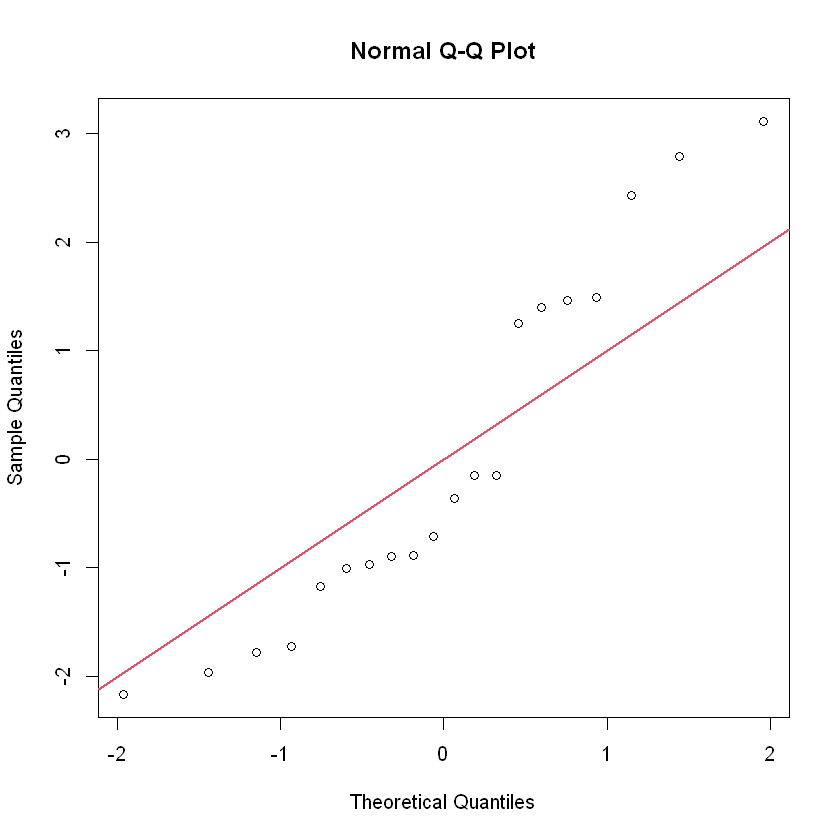

In [15]:
# Prueba de normalidad de los residuos
residuos <- modelo$residuals
qqnorm(residuos)
abline(0, 1, col = 2, lwd = 2)
shapiro.test(residuos)

Gráficamente se puede ver que no se cumple el supuesto de normalidad, pues los datos no se ajustan a una distribución normal. Los cuantiles teóricos no coindicen con los cuantiles reales del modelo.

La prueba Shapiro-Wilk nos indica un probabilidad de 0.06, mayor a un $\alpha=0.05$, por lo cual no rechazamos la hipótesis nula. Es decir, el error se distribuye normal. De igual manera estudiaremos una corrección.

## 2. Revise si es necesario transformar alguna de las variables

Graficamos un diagrama de dispersión para identificar posibles transformaciones de las variables:

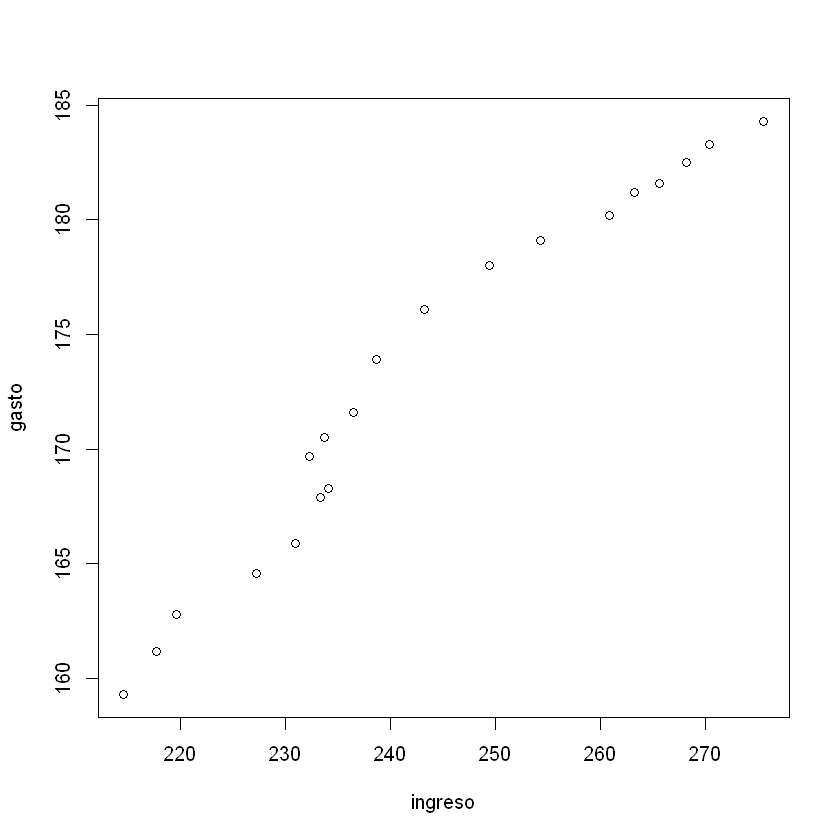

In [16]:
plot(data)

Pareciera que conforme crece el ingreso, incrementa el gasto, pero en menor proporción a mayores ingresos. Esto sugiere que se haga una transformación de la variable X con $g(x) = ln(x)$. Definimos el siguiente modelo con la transformación.

,ingreso,gasto
,<dbl>,<dbl>
1,5.368776,159.3
2,5.383118,161.2
3,5.391808,162.8
4,5.425831,164.6
5,5.441985,165.9
6,5.452325,167.9


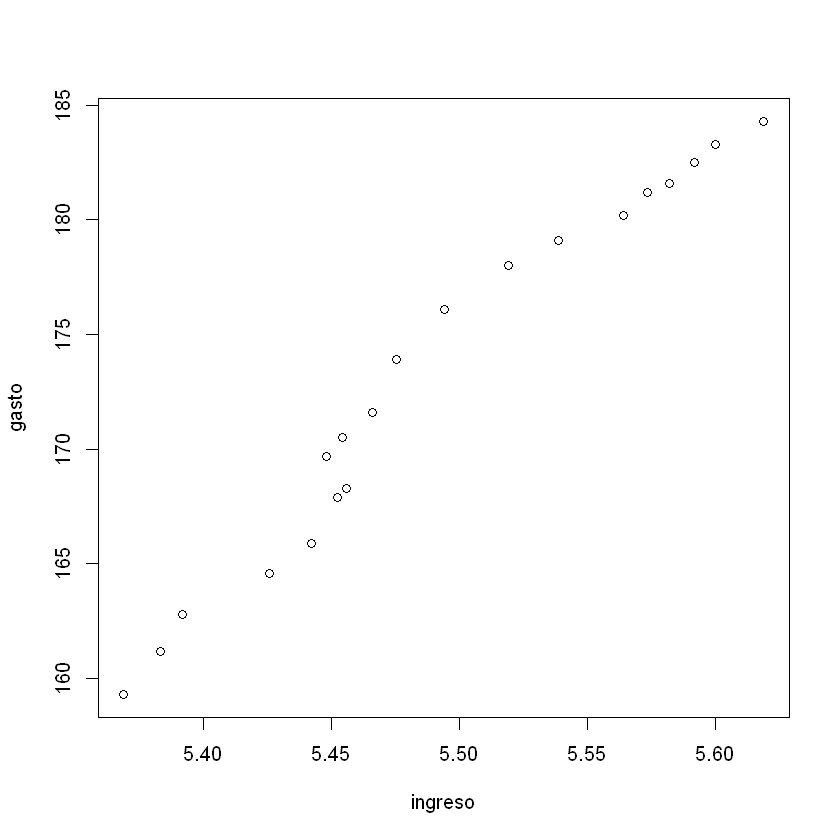

In [20]:
# Creamos un modelo transformado
data_logged <- data
data_logged["ingreso"] <- log(data_logged["ingreso"])
head(data_logged)
plot(data_logged)

Evaluamos si el nuevo modelo tiene problemas de normalidad.


Call:
lm(formula = gasto ~ ingreso, data = data_logged)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0655 -1.0850 -0.4646  1.2055  2.8293 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -388.319     24.958  -15.56 6.98e-12 ***
ingreso      102.221      4.544   22.50 1.25e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.519 on 18 degrees of freedom
Multiple R-squared:  0.9657,	Adjusted R-squared:  0.9637 
F-statistic: 506.1 on 1 and 18 DF,  p-value: 1.253e-14



	Shapiro-Wilk normality test

data:  residuos
W = 0.92228, p-value = 0.1096


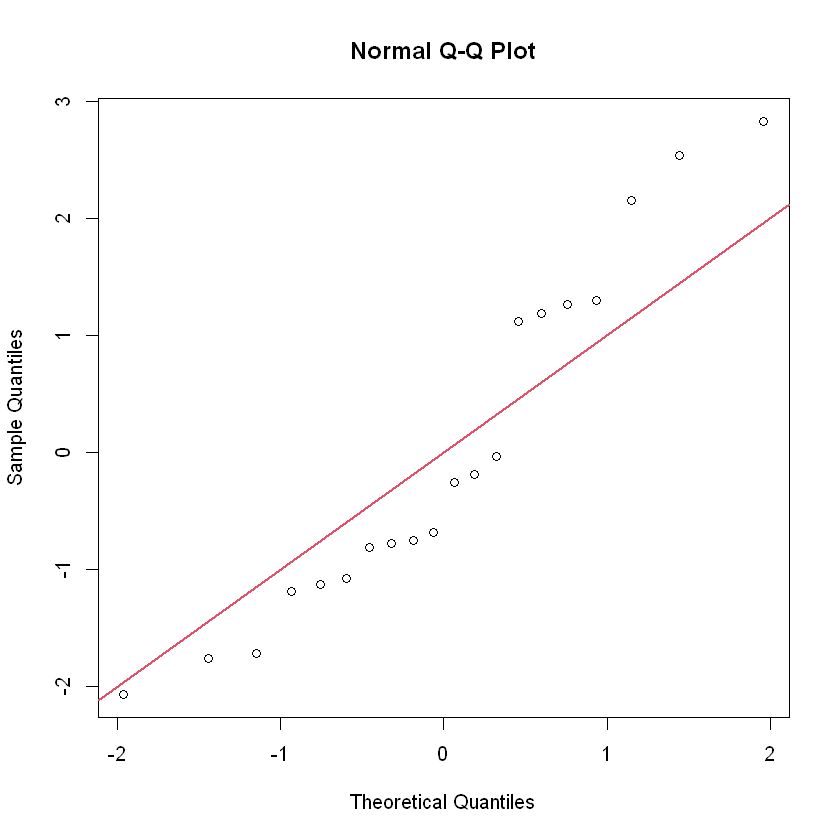

In [21]:
# Prueba de normalidad de los nuevos residuos
modelo_logged <- lm(gasto ~ ingreso, data = data_logged)
summary(modelo_logged)
residuos <- modelo_logged$residuals
qqnorm(residuos)
abline(0, 1, col = 2, lwd = 2)
shapiro.test(residuos)

Concluimos, con un $\alpha = 0.05$, que no podemos rechazar la hipótesis nula y por lo tanto suponemos que el error del nuevo modelo sí se distribuye normal.

## 3. ¿Existe problema de autocorrelación positiva?

No hay una distacia o espacio obvio por el cual podríamos ordenar las observaciones por lo que suponemos el orden según los índices de la tabla.

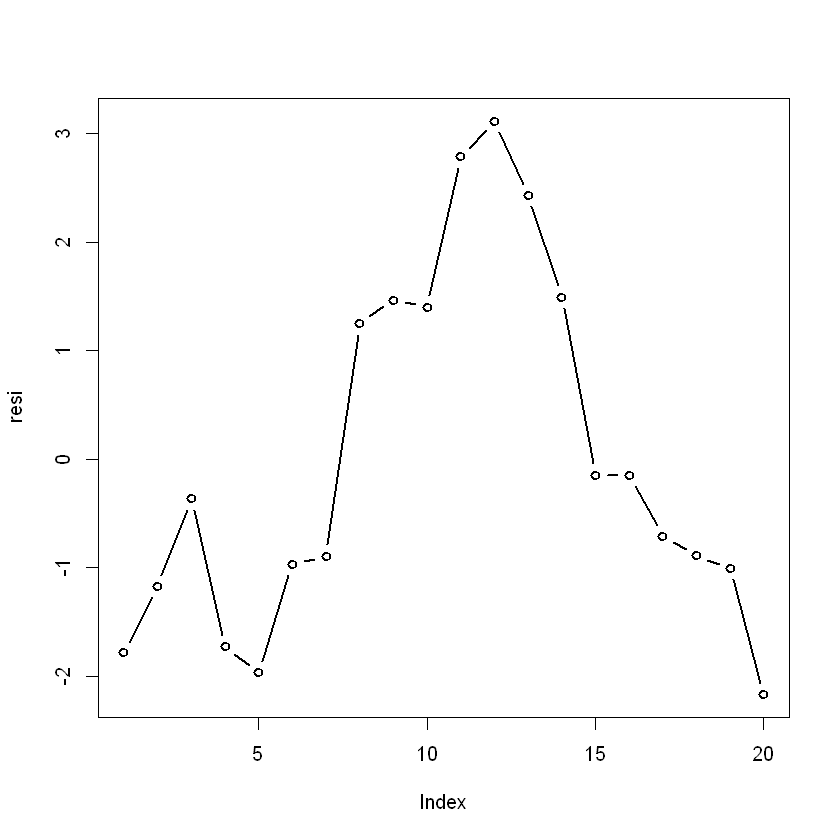

In [27]:
# Gráfica de los residuales
resi=modelo$residuals
plot(resi,type="b",lwd=2)

Dado los resultados obtenidos de la anterior gráfica, suponemos un lag de 1, es decir $k=1$.

Procedemos a realizar la prueba de Breusch-Godfrey.
Probaremos las hipótesis:
\begin{align*}
    H_0: &\text{Modelo AR}(1)\text{ no es significativo} \\
    H_1: &\neg H_0.
\end{align*}

In [36]:
n <- length(resi)
data_resi <- data.frame(e_t = resi[2:n], e_t_1 = resi[1:n-1])
head(data_resi)

,e_t,e_t_1
,<dbl>,<dbl>
2,-1.1740950,-1.7840734
3,-0.3647533,-1.1740950
4,-1.7273868,-0.3647533
5,-1.9670900,-1.7273868
6,-0.9658163,-1.9670900
7,-0.8987251,-0.9658163


In [46]:
modelo_resi <- lm(e_t ~ e_t_1, data = data_resi)
summary(modelo_resi)


Call:
lm(formula = e_t ~ e_t_1, data = data_resi)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41830 -0.53122 -0.08384  0.52155  2.00875 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.002139   0.217707  -0.010    0.992    
e_t_1        0.841514   0.138499   6.076 1.24e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9465 on 17 degrees of freedom
Multiple R-squared:  0.6847,	Adjusted R-squared:  0.6662 
F-statistic: 36.92 on 1 and 17 DF,  p-value: 1.235e-05


In [47]:
# Breusch-Godfrey
EP_BG <- n * 0.6847
1-pchisq(EP_BG, df = 1)


[1] 0.0002151407

Procedemos a realizar la prueba de Durbin-Watson.

Probaremos las hipótesis para un modelo $e_t = \rho e_{t-1} + w_t$:
\begin{align*}
    H_0: &\rho = 0 \\
    H_1: &\rho > 0.
\end{align*}

In [48]:
# Durbin-Watson
library(lmtest)
dwtest(modelo)



	Durbin-Watson test

data:  modelo
DW = 0.31771, p-value = 1.603e-08
alternative hypothesis: true autocorrelation is greater than 0


Concluimos, con un $\alpha = 0.05$, por las pruebas Breusch-Godrey y Durbin-Watson, que el modelo original tiene problemas de autocorrelación para lags de una etapa.

## 4. Corriga el problema si es necesario.

Como vimos en el punto anterior, si es necesario corregir el problema de autocorrelación, por lo que se procede a realizar la corrección de Cochrane-Orcutt.

In [50]:
# Corrección de la autocorrelación
rho <- cor(resi[1:(n-1)], resi[2:n])

y2 <- data$gasto[2:n]-rho*data$gasto[1:(n-1)]
x2 <- data$ingreso[2:n]-rho*data$ingreso[1:(n-1)]

modelo_corregido=lm(y2~x2)
summary(modelo_corregido)


Call:
lm(formula = y2 ~ x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3324 -0.3835 -0.1091  0.3513  1.3100 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.79237    1.82877  10.823 4.80e-09 ***
x2           0.25124    0.04056   6.194 9.81e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6741 on 17 degrees of freedom
Multiple R-squared:  0.693,	Adjusted R-squared:  0.6749 
F-statistic: 38.37 on 1 and 17 DF,  p-value: 9.807e-06


Despues de hacer la corrección de cochrane.Orcutt debemos verificar que en efecto ya no hay problemas de autocorrelación positiva por lo que se vuelve a hacer la prueba de Durbin-Watson.

Procedemos a realizar la prueba de Durbin-Watson.

Probaremos las hipótesis para un modelo $e_t = \rho e_{t-1} + w_t$:
\begin{align*}
    H_0: &\rho = 0 \\
    H_1: &\rho > 0.
\end{align*}

In [51]:
# Durbin-Watson
dwtest(modelo_corregido)



	Durbin-Watson test

data:  modelo_corregido
DW = 1.5137, p-value = 0.09154
alternative hypothesis: true autocorrelation is greater than 0


Concluimos, con un $\alpha = 0.05$, por la prueba de Durbin-Watson, que el nuevo modelo ya no tiene problemas de autocorrelación para lags de una etapa.